<a href="https://colab.research.google.com/github/LoveyThePigeon/Algorithms/blob/main/W9_dijkstra_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [8]:
import heapq
import pandas as pd

def dijkstra(graph, start):
    """
    Implements Dijkstra's algorithm to find the shortest path in a graph.

    Parameters:
    graph (dict): A dictionary where keys are nodes and values are lists of tuples (neighbor, weight).
    start (str): The starting node for Dijkstra's algorithm.

    Returns:
    tuple: A dictionary of shortest distances and a dictionary of previous nodes.
    """
    # Priority queue to store (distance, node)
    priority_queue = []
    heapq.heappush(priority_queue, (0, start))

    # Dictionary to store the shortest path to each node
    shortest_paths = {node: float('inf') for node in graph}
    shortest_paths[start] = 0

    # Dictionary to store the previous node in the shortest path
    previous_nodes = {node: None for node in graph}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        # Skip processing if we already found a shorter path
        if current_distance > shortest_paths[current_node]:
            continue

        # Process each neighbor of the current node
        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight

            # If a shorter path is found
            if distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = distance
                previous_nodes[neighbor] = current_node  # Track the previous node
                heapq.heappush(priority_queue, (distance, neighbor))

    return shortest_paths, previous_nodes

def display_as_dataframe(shortest_paths, previous_nodes):
    """
    Displays the shortest path results as a pandas DataFrame.

    Parameters:
    shortest_paths (dict): A dictionary where keys are nodes and values are the shortest distance from the start node.
    previous_nodes (dict): A dictionary where keys are nodes and values are the previous node in the shortest path.

    Returns:
    pd.DataFrame: DataFrame with columns for node, shortest distance, and previous node.
    """
    data = {
        'Node': list(shortest_paths.keys()),
        'Shortest Distance': list(shortest_paths.values()),
        'Previous Node': [previous_nodes[node] for node in shortest_paths]
    }

    df = pd.DataFrame(data)
    return df

# Example graph
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 3), ('D', 2)],
    'C': [('A', 4), ('B', 3), ('D', 1)],
    'D': [('B', 2), ('C', 1)]
}

# Find shortest paths from node 'A'
start_node = 'A'
shortest_paths, previous_nodes = dijkstra(graph, start_node)

# Display results as DataFrame
df = display_as_dataframe(shortest_paths, previous_nodes)
print(f"Shortest paths from node {start_node}:")
df


Shortest paths from node A:


,Node,Shortest Distance,Previous Node
0,A,0,None
1,B,1,A
2,C,4,A
3,D,3,B


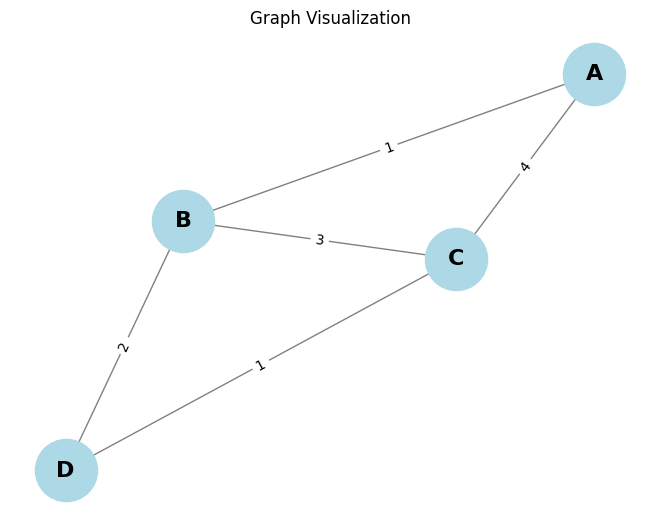

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add edges to the graph with weights
edges = [
    ('A', 'B', 1),
    ('A', 'C', 4),
    ('B', 'C', 3),
    ('B', 'D', 2),
    ('C', 'D', 1)
]
G.add_weighted_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # Position the nodes using the spring layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Save the graph to a PNG file
plt.title("Graph Visualization")
plt.savefig("graph.png")

# Display the graph
plt.show()
